In [1]:
import numpy as np
import pandas as pd
from EstimateEffect import *

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
betas_df = pd.read_csv('data/betas_500.csv')
pds_df = pd.read_csv('data/pds.csv')

betas_df_t = betas_df.set_index('Unnamed: 0').T.reset_index().rename(columns={'index': 'sampleid'})

merged_df = pd.merge(pds_df, betas_df_t, on='sampleid')

def clean_column_names(col_name):
    if "::" in col_name:
        return col_name.split("::")[0]
    return col_name

merged_df.columns = [clean_column_names(col) for col in merged_df.columns]

merged_df.head()

,Unnamed: 0,sampleid,Group,Gestwk,Babygender,Ethnicity,Dataset,ABO,ACADL,ACOT11,...,ZNF560,ZNF562,ZNF572,ZNF577,ZNF660,ZNF667,ZNF785,ZNF804B,ZSCAN12,ZSCAN16
0,1,GSM788417,Control,8.0,M,White,GSE31781,0.286653,0.100830,0.714489,...,0.216980,0.115556,0.382673,0.141096,0.395113,0.169859,0.554643,0.260140,0.153931,0.155679
1,2,GSM788419,Control,8.0,M,White,GSE31781,0.279650,0.087703,0.713941,...,0.217710,0.078361,0.358216,0.143691,0.394575,0.153465,0.545284,0.221913,0.144950,0.119980
2,3,GSM788420,Control,8.0,M,White,GSE31781,0.268227,0.081340,0.714192,...,0.196714,0.093258,0.367346,0.140717,0.402525,0.159516,0.564620,0.201813,0.142980,0.124261
3,4,GSM788421,Control,9.0,M,White,GSE31781,0.267576,0.080080,0.711066,...,0.184075,0.072457,0.385657,0.141546,0.409713,0.145243,0.549677,0.247063,0.144411,0.129721
4,5,GSM788414,Control,12.0,F,Asian,GSE31781,0.265860,0.078628,0.715149,...,0.208951,0.061186,0.358398,0.140577,0.360815,0.126509,0.499693,0.222571,0.148082,0.121801


In [3]:
df = merged_df.drop(columns=['Unnamed: 0', 'sampleid', 'Gestwk', 'Ethnicity', 'Dataset', 'Babygender'])
df.head()

,Group,ABO,ACADL,ACOT11,ADAMTS14,ADCY4,ADD2,ADORA2B,ADRA1A,ADRA2C,...,ZNF560,ZNF562,ZNF572,ZNF577,ZNF660,ZNF667,ZNF785,ZNF804B,ZSCAN12,ZSCAN16
0,Control,0.286653,0.100830,0.714489,0.216138,0.463232,0.211398,0.556021,0.375335,0.332831,...,0.216980,0.115556,0.382673,0.141096,0.395113,0.169859,0.554643,0.260140,0.153931,0.155679
1,Control,0.279650,0.087703,0.713941,0.186465,0.485031,0.201391,0.620715,0.361520,0.327508,...,0.217710,0.078361,0.358216,0.143691,0.394575,0.153465,0.545284,0.221913,0.144950,0.119980
2,Control,0.268227,0.081340,0.714192,0.195455,0.461802,0.210969,0.545269,0.364272,0.312898,...,0.196714,0.093258,0.367346,0.140717,0.402525,0.159516,0.564620,0.201813,0.142980,0.124261
3,Control,0.267576,0.080080,0.711066,0.188846,0.433606,0.208251,0.617009,0.380944,0.289887,...,0.184075,0.072457,0.385657,0.141546,0.409713,0.145243,0.549677,0.247063,0.144411,0.129721
4,Control,0.265860,0.078628,0.715149,0.164783,0.435845,0.212740,0.615782,0.363593,0.291139,...,0.208951,0.061186,0.358398,0.140577,0.360815,0.126509,0.499693,0.222571,0.148082,0.121801


In [4]:
df['Group'] = df['Group'].map({'Control': 0, 'Preeclampsia': 1})
df.head()

,Group,ABO,ACADL,ACOT11,ADAMTS14,ADCY4,ADD2,ADORA2B,ADRA1A,ADRA2C,...,ZNF560,ZNF562,ZNF572,ZNF577,ZNF660,ZNF667,ZNF785,ZNF804B,ZSCAN12,ZSCAN16
0,0,0.286653,0.100830,0.714489,0.216138,0.463232,0.211398,0.556021,0.375335,0.332831,...,0.216980,0.115556,0.382673,0.141096,0.395113,0.169859,0.554643,0.260140,0.153931,0.155679
1,0,0.279650,0.087703,0.713941,0.186465,0.485031,0.201391,0.620715,0.361520,0.327508,...,0.217710,0.078361,0.358216,0.143691,0.394575,0.153465,0.545284,0.221913,0.144950,0.119980
2,0,0.268227,0.081340,0.714192,0.195455,0.461802,0.210969,0.545269,0.364272,0.312898,...,0.196714,0.093258,0.367346,0.140717,0.402525,0.159516,0.564620,0.201813,0.142980,0.124261
3,0,0.267576,0.080080,0.711066,0.188846,0.433606,0.208251,0.617009,0.380944,0.289887,...,0.184075,0.072457,0.385657,0.141546,0.409713,0.145243,0.549677,0.247063,0.144411,0.129721
4,0,0.265860,0.078628,0.715149,0.164783,0.435845,0.212740,0.615782,0.363593,0.291139,...,0.208951,0.061186,0.358398,0.140577,0.360815,0.126509,0.499693,0.222571,0.148082,0.121801


In [7]:
import time

def measure_time_complexity(algorithm, data):
    start_time = time.time()
    EstimationModel = EstimateEffect(data)
    EstimationModel.find_causal_graph(algo=algorithm)
    print(f"{algorithm} : {time.time() - start_time}")
    return time.time() - start_time

# Create sample feature sets by incrementally increasing feature size
feature_counts = np.linspace(3, 30, num=10, dtype=int)
pc_times = []
ccdr_times = []

for n_features in feature_counts:
    # Subset the data to the first n features
    print(f"Features: {n_features}")

    random_features = np.random.choice(df.columns, size=n_features, replace=False)
    data_subset = df[random_features]

    ccdr_times.append(measure_time_complexity('CCDr', data_subset))
    pc_times.append(measure_time_complexity('pc', data_subset))

Features: 3
CCDr : 1.080498218536377
pc : 0.01495814323425293
Features: 6
CCDr : 0.93343186378479
pc : 0.037229061126708984
Features: 9
CCDr : 0.9444589614868164
pc : 0.07406783103942871
Features: 12
CCDr : 0.9449231624603271
pc : 0.26339197158813477
Features: 15
CCDr : 0.9597289562225342
pc : 0.17358613014221191
Features: 18
CCDr : 1.0162837505340576
pc : 0.5030059814453125
Features: 21
CCDr : 1.0006258487701416
pc : 0.5653269290924072
Features: 24
CCDr : 1.0725057125091553


KeyboardInterrupt: 

In [14]:
feature_counts

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

In [15]:
pc_times = [0.0149798393249512, 0.0372443199157715, 0.0741009712219238, 0.263502836227417, 0.173618078231812, 0.503117084503174, 0.565398931503296, 70, None, None]
pc_times

[0.0149798393249512,
 0.0372443199157715,
 0.0741009712219238,
 0.263502836227417,
 0.173618078231812,
 0.503117084503174,
 0.565398931503296,
 70,
 None,
 None]

In [16]:
ccdr_times.append(None)
ccdr_times.append(None)

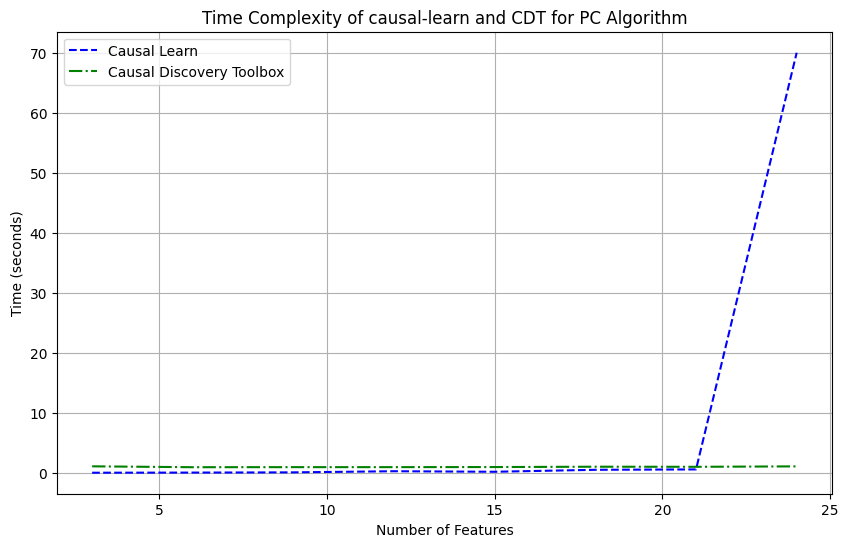

In [21]:
# Plot the time complexity comparison
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, pc_times, label='Causal Learn', color='blue', linestyle='--')
plt.plot(feature_counts, ccdr_times, label='Causal Discovery Toolbox', color='green', linestyle='-.')

# Adding labels and title
plt.title('Time Complexity of causal-learn and CDT for PC Algorithm')
plt.xlabel('Number of Features')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()